## PCA

If you have datasets x and y, how do you find the average?
Let's say you take the average of the x values, and the average of the y values separately.
How to use standard deviation? Use a normal distribution, which has a Gaussian shape, where the curve is proportional to e^(-(x-mu)^2/(2sigma)^2) where mu is your average and sigma is your standard deviation.
Width is proportional to sigma.

Sigma = sum of (x_n - average)^2 / (n-1)
Variance = sigma^2
Co-variance = sum(x_n - average)(x_n - average)^T / (n-1)

PCA = principal component analysis
-we want to automatically find out where the max and min variance is in your data's distribution
-graphically, it can be imagined as rotating your data to fit a new axis (vectors) with which you can do analysis on

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.random.normal(-1, 1, 500)
y = np.random.normal(1.5, 4, 500)

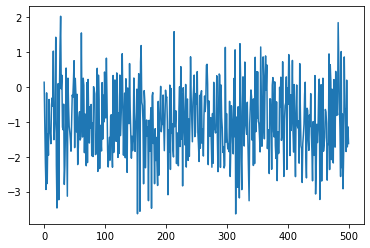

In [3]:
plt.plot(x)

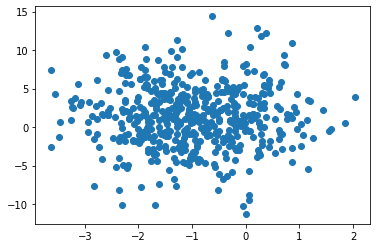

In [4]:
plt.scatter(x, y)

In [5]:
x.mean()

-0.9922602319430129

In [6]:
x.std()

1.0389289682737237

In [7]:
X = np.vstack((x, y)).T

In [8]:
x.shape

(500,)

In [9]:
X.shape

(500, 2)

In [10]:
X_mean = np.vstack((x-x.mean(), y-y.mean())).T # translating the data by shifting the data points by their dataset's mean

In [11]:
X_mean[:,0].mean()
# :,0 means take all values (:) in the 0th colomn. 0,: would mean all values in the 0th row

-3.907985046680551e-17

(-12.0, 12.0)

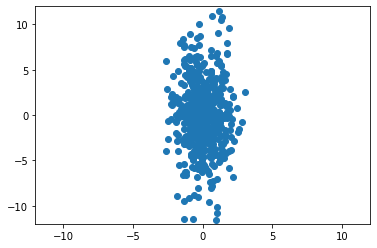

In [12]:
plt.scatter(X_mean[:,0], X_mean[:,1])
plt.xlim(-12, 12)
plt.ylim(-12, 12)

# Rotating a Matrix

Rotating two vectors by theta uses a rotation matrix
R = [cos(theta) -sin(theta)]
    [sin(theta)  cos(theta)]
x' = xcos(theta) + ysin(theta)    
y' = xcos(theta) - ysin(theta)

For our X_mean, we want an X_mean' = X_mean*R

In [13]:
v1 = np.array(((1, 2), (1, 2)))
v2 = np.array(((1, 3), (1, 3)))
v2

array([[1, 3],
       [1, 3]])

In [14]:
# to multiply matrices in python, * will multiply each element individually. @ will properly multiply matrices, as will np.dot
print(v1 * v2)
print(v1 @ v2)
np.dot(v1, v2)

[[1 6]
 [1 6]]
[[3 9]
 [3 9]]


array([[3, 9],
       [3, 9]])

In [15]:
theta = 50/180 * np.pi # degrees / 180 * pi
rot_mat = np.array(((np.cos(theta), np.sin(theta)), (-np.sin(theta), np.cos(theta))))

In [16]:
rot_mat

array([[ 0.64278761,  0.76604444],
       [-0.76604444,  0.64278761]])

In [17]:
X_rot = X_mean @ rot_mat

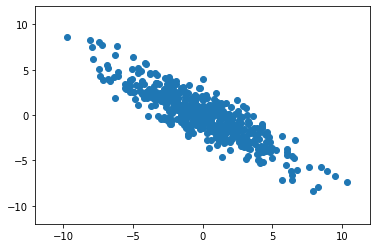

In [18]:
plt.scatter(X_rot[:, 0], X_rot[:, 1])
plt.xlim(-12, 12)
plt.ylim(-12, 12)

plt.show()

# Eigen Vectors
If you have a vector v1, it is comprised of ai_hat + bj_hat, where i_hat and j_hat are eigen vectors. If you switch coordinate systems, v1 is now comprised of a'i_hat' + b'j_hat'.
The covariance matrix tells us the differences of the data from the mean, but the eigen vectors of that matrix will give us the "coordinate system"

In [19]:
X_rot.shape

(500, 2)

In [20]:
cov_mat = np.cov(X_rot.T) # tells us how much the numbers are changing in the xx, yy, xy, and yx directions.
cov_mat # notice xy and yx are the same!

array([[ 9.84649326, -7.33381403],
       [-7.33381403,  7.2178352 ]])

In [21]:
eigen_val, eigen_vec = np.linalg.eig(cov_mat) # first output is eigen values. second is eigen vectors

Eigen values tell us magnitude in a specific projection

In [22]:
print(eigen_val)
print(eigen_vec)

[15.98282118  1.08150728]
[[ 0.76694343  0.64171472]
 [-0.64171472  0.76694343]]


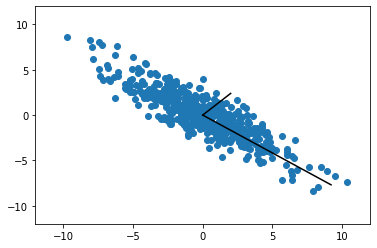

In [23]:
plt.scatter(X_rot[:, 0], X_rot[:, 1])

for e, v in zip(eigen_val, eigen_vec.T):
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], 'k-') # 3 is chosen to get our lines out to 3*sigma

plt.xlim(-12, 12)
plt.ylim(-12, 12)

plt.show()

# Single Value Decomposition
If you have an m x n matrix, SVD splits it into m x m singular vectors, eigen values in a diagonal matrix of m x n, and eigen vector matrix of n x n.


In [24]:
U, S, V = np.linalg.svd(X_rot)

In [25]:
S.shape

(2,)

In [26]:
U.shape

(500, 500)

In [27]:
V.shape

(2, 2)

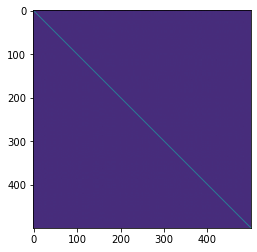

In [28]:
plt.imshow(U)

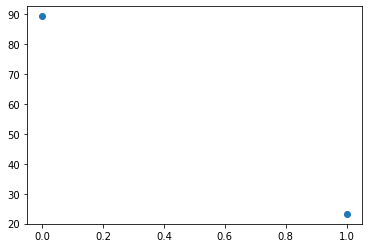

In [29]:
plt.plot(S, 'o')

In [30]:
ncomp = 1
projected = U[:, :ncomp] @ np.diag(S[:ncomp]) @ V[:ncomp, :] # taking first column of U, multiplying first eigen value, multiplying first eigen vector

In [31]:
projected.shape

(500, 2)

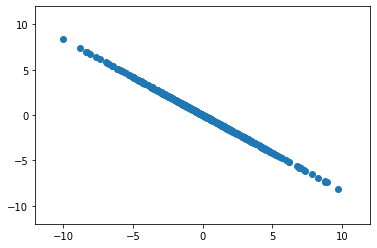

In [32]:
plt.scatter(projected[:, 0], projected[:, 1])
plt.xlim(-12, 12)
plt.ylim(-12, 12)

plt.show()

In [33]:
ncomp = 2
projected2 = U[:, 1:ncomp] @ np.diag(S[1:ncomp]) @ V[1:ncomp, :] # taking first column of U, multiplying first eigen value, multiplying first eigen vector

In [34]:
projected2.shape

(500, 2)

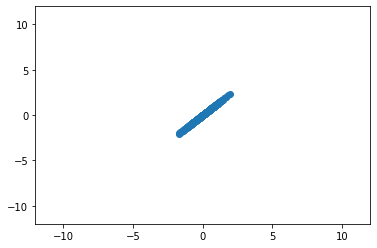

In [35]:
plt.scatter(projected2[:, 0], projected2[:, 1])
plt.xlim(-12, 12)
plt.ylim(-12, 12)

plt.show()